# <center>East St. Louis Model

## Import files

These are all of the packages needed to run this code. Feel free to add more packages as needed.

In [1]:
import pyproj

# model packages
import flopy
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mp
from mpl_toolkits.mplot3d import Axes3D

# spatial plotting
import pylab
from mpl_toolkits.basemap import Basemap

# kmz reader
%run kmzreader.py

# interpolation
from pykrige.uk import UniversalKriging


#jupyter specific--included to show plots in notebook
%matplotlib inline 

flopy is installed in /home/user/.local/lib/python3.6/site-packages/flopy


# Define model object

In [2]:
# define the model object
modelname = "AmerBot"
mfm = flopy.modflow.Modflow(modelname, exe_name = r"C:\Users\Quilson2\OneDrive\Documents\SPRING21\582-GWMod\Course_Materials\Assignments\mf2005)

# Set grid domain

Note that we define our grid domain as lat/longs. We then define a basemap object, which we will use to convert lat/longs in our input files to our model/map coordinates.

Caution that basemap creates a grid with meter spacing. All of our inputs and outputs should be in feet, so you have to convert all inputs from feet to meters and then all outputs from meters to feet for final display.

In [3]:
# define min and max lat / long
minlong = -90.28
maxlong = -89.99
minlat = 38.48
maxlat = 38.90

# create basemap object, needed to transform lat/long into a grid with meter spacing
m = Basemap(llcrnrlon=minlong,llcrnrlat=minlat,urcrnrlon=maxlong,urcrnrlat=maxlat,
             resolution='i', projection='lcc', lat_0 = minlat, lon_0 = minlong)

# Define the grid and assign property inputs

### Import Excel file

The following Excel file is based on a 625 ft grid shapefile that defines top elevation, bottom elevation of three layers, and the hydraulic conductivity of each layer.

In [4]:
modprop = pd.read_excel('elevations_ks_Riley.xlsx')

In [5]:
modprop

,lat,long,Top,Bot1,Bot2,Bot3,k1,k2,k3
0,38.4818,-90.2504,401,384.0,286,253,0.0001,50.0000,500.0000
1,38.4818,-90.2460,404,387.0,288,255,0.0001,50.0000,500.0000
2,38.4852,-90.2505,406,389.0,289,255,0.0001,50.0000,500.0000
3,38.4817,-90.2548,417,399.0,292,257,0.0001,50.0000,500.0000
4,38.4887,-90.2505,405,389.0,290,257,0.0001,50.0000,500.0000
5,38.4921,-90.2505,400,384.0,290,258,0.0001,50.0000,500.0000
6,38.4921,-90.2549,406,390.0,291,259,0.0001,50.0000,500.0000
7,38.4956,-90.2506,404,388.0,292,259,0.0001,50.0000,500.0000
8,38.4852,-90.2548,396,381.0,291,260,0.0001,50.0000,500.0000
9,38.4886,-90.2549,403,387.0,292,260,0.0001,50.0000,500.0000


### Define properties

There are three values used to define hydraulic conductivity above: 1) aquitard k_h of 0.0001 ft/day, 2) fine sand k_h of 50 ft/day, and 3) coarse sand of 500 ft/day. These are starting values and should be part of what you change during calibration.

Adjust k1_zone, k2_zone, and k3_zone if you want to change values from default. The rest of this code will make that modification for you. The code is designed such that you should still be working with ft/day.

In [6]:
# values to change during calibration
k1_zone = 0.0001 #ft/day, aquitard
k2_zone = 50. #ft/day, fine sand
k3_zone = 500. #ft/day, coarse sand

# reset values in the above data frame
modprop.loc[modprop['k1'] == 0.0001, 'k1'] = k1_zone
modprop.loc[modprop['k2'] == 0.0001, 'k2'] = k1_zone
modprop.loc[modprop['k3'] == 0.0001, 'k3'] = k1_zone

modprop.loc[modprop['k1'] == 50., 'k1'] = k2_zone
modprop.loc[modprop['k2'] == 50., 'k2'] = k2_zone
modprop.loc[modprop['k3'] == 50., 'k3'] = k2_zone

modprop.loc[modprop['k1'] == 500., 'k1'] = k3_zone
modprop.loc[modprop['k2'] == 500., 'k2'] = k3_zone
modprop.loc[modprop['k3'] == 500., 'k3'] = k3_zone

### Select a subset of the data

We are limited by CoCalc when trying to do interpolation with all the input data. Let's remove 4800 of the original 5448 points at random and assign to a new dataframe. Also, conduct unit conversion to m/day for all units here. 

In [7]:
# create a new dataframe with fewer points for purposes of numerical efficiency when interpolating.
remove_n = 4800
drop_indices = np.random.choice(modprop.index, remove_n, replace=False)
modprop_subset = modprop.drop(drop_indices)

# convert ft to meters for all units
modprop_subset['Top'] = modprop_subset['Top']/3.28
modprop_subset['Bot1'] = modprop_subset['Bot1']/3.28
modprop_subset['Bot2'] = modprop_subset['Bot2']/3.28
modprop_subset['Bot3'] = modprop_subset['Bot3']/3.28
modprop_subset['k1'] = modprop_subset['k1']/3.28
modprop_subset['k2'] = modprop_subset['k2']/3.28
modprop_subset['k3'] = modprop_subset['k3']/3.28

### Assign basic information about the grid

All spatial information is defined in meters and days, consistent with the output of the Basemap (which is used to convert lat/long into model coordinates).

In [8]:
#define spatial grid

# model width x direction
Lx = 26000. #m
# model width y direction
Ly = 47000. #m

# number of layers
nlay = 3

# spatial discretization of each cell
# let's start with 500 m
dx = 500. #m
dy = 500. #m

# number of rows and columns
nrow = int(Ly/dy)
ncol = int(Lx/dx)

# define the grid spacing as a numpy array
xgrid_m = np.arange(0,Lx,dx)
ygrid_m = np.arange(0,Ly,dy)



### Assign stress period data

In [9]:
#specify number of stress periods
nper = 1
steady = [True]

### Conduct interpolation of top layer, 3 bottom layers, and 3 k_h layers

In [10]:
# Convert lat/longs of point data into model coordinates
xloc_m, yloc_m = m(np.array(modprop_subset.long), np.array(modprop_subset.lat))

In [11]:
# interpolate top elevation
UKtop = UniversalKriging(xloc_m, yloc_m, modprop_subset.Top, variogram_model='spherical',nlags=7)
ztop, var = UKtop.execute('grid', xgrid_m,ygrid_m)
ztop = ztop.filled(fill_value=None)

In [12]:
# interpolate bottom of layer 1 elevation
UKb1 = UniversalKriging(xloc_m, yloc_m, modprop_subset.Bot1, variogram_model='spherical',nlags=7)
zb1, var = UKb1.execute('grid', xgrid_m,ygrid_m)
zb1 = zb1.filled(fill_value=None)

In [13]:
# interpolate bottom of layer 2 elevation
UKb2 = UniversalKriging(xloc_m, yloc_m, modprop_subset.Bot2, variogram_model='spherical',nlags=7)
zb2, var = UKb2.execute('grid', xgrid_m,ygrid_m)
zb2 = zb2.filled(fill_value=None)

In [14]:
# interpolate bottom of layer 3 elevation
UKb3 = UniversalKriging(xloc_m, yloc_m, modprop_subset.Bot3, variogram_model='spherical',nlags=7)
zb3, var = UKb3.execute('grid', xgrid_m,ygrid_m)
zb3 = zb3.filled(fill_value=None)

In [15]:
# interpolate k_h 1 
UKk1 = UniversalKriging(xloc_m, yloc_m, modprop_subset.k1, variogram_model = 'linear',nlags = 2)
k1, var = UKk1.execute('grid',xgrid_m,ygrid_m)
k1 = k1.filled(fill_value = None)

In [16]:
# interpolate k_h 2 
UKk2 = UniversalKriging(xloc_m, yloc_m, modprop_subset.k2, variogram_model = 'linear',nlags = 2)
k2, var = UKk2.execute('grid',xgrid_m,ygrid_m)
k2 = k2.filled(fill_value = None)

In [17]:
# interpolate k_h 3 
UKk3 = UniversalKriging(xloc_m, yloc_m, modprop_subset.k3, variogram_model = 'linear',nlags = 2)
k3, var = UKk3.execute('grid',xgrid_m,ygrid_m)
k3 = k3.filled(fill_value = None)

### Fix layer overlap

In MODFLOW, the bottom elevation of a cell must be below either the top elevation (layer 1), or the bottom elevation of the overlying layer (layers 2 and up). As a result, we must write a code to fix any layer overlap by showing the bottom elevation of a cell down if needed. Here, we ensure that all bottom elevations are at least a foot below the overlying elevation.

In [18]:
# determine the dimensions of the numpy array for a layer; they are all the same so we choose ztop
griddim = ztop.shape #rows and columnes in the array

# loop through all rows and columns in the numpy array
# check if statements to see if there is layer overlap, and fix accordingly by showing the lowest layer down.
for a in np.arange(griddim[0]):
    for b in np.arange(griddim[1]):
        if ztop[a,b] <= zb1[a,b]:
            zb1[a,b] = ztop[a,b]-1 #push layer down
        if zb1[a,b] <= zb2[a,b]:
            zb2[a,b] = zb1[a,b] -1
        if zb2[a,b] <= zb3[a,b]:
            zb3[a,b] = zb2[a,b] - 1

### Assign floor and ceiling for k_h

During interpolation, hydraulic conductivity can be less or greater than the values assigned, and can even become negative! MODFLOW doesn't understand negative k_h values. As a result, the following code has been added to add a floor and celing to the k_h values.

In [19]:
# floor at the minimum k_h value and ceiling at the maximum k_h value
for a in np.arange(griddim[0]):
    for b in np.arange(griddim[1]):
        if k1[a,b] < modprop_subset.k1.min():
            k1[a,b] = modprop_subset.k1.min()
        if k2[a,b] < modprop_subset.k2.min():
            k2[a,b] = modprop_subset.k2.min()
        if k3[a,b] < modprop_subset.k3.min():
            k3[a,b] = modprop_subset.k3.min()
        if k1[a,b] > modprop_subset.k1.max():
            k1[a,b] = modprop_subset.k1.max()
        if k2[a,b] > modprop_subset.k2.max():
            k2[a,b] = modprop_subset.k2.max()
        if k3[a,b] > modprop_subset.k3.max():
            k3[a,b] = modprop_subset.k3.max()

# Dis file

In [20]:
# combine bottom layer arrays into a single list
zbot = [zb1,zb2,zb3]

#create flopy discretization object, length and time are meters (2) and days (4)
dis = flopy.modflow.ModflowDis(model=mfm, nlay=nlay, nrow=nrow, ncol=ncol, 
                               delr=dx, delc=dy, top=ztop, botm=zbot, 
                               itmuni = 4, lenuni = 2, 
                               nper=nper, steady=steady)

# BASIC file

In [21]:
#create ibound as array of ints = 1
ibound = np.ones((nlay, nrow, ncol), dtype=np.int32)

# starting heads equal to the top of layer 1
strt = ztop

#create flopy bas object
bas = flopy.modflow.ModflowBas(mfm, ibound=ibound, strt=strt)

# Rivers

Pay particular attention to how rows and columns are calculated from grid coordinates. You will need to do the same thing for pumping wells.

In [22]:
# import kmz with river data as a dataframe
missriv = keyholemarkup2x('stagedata.kmz',output='df')
# drop unused columns
missriv = missriv.drop(['LookAt','Point','altitude','coordinates','gx:altitudeMode','gx:drawOrder','heading','range','styleUrl','tilt'],axis=1)
# extract lat/long as numpy arrays
longx = np.array(missriv.longitude).astype(np.float)
laty = np.array(missriv.latitude).astype(np.float)
# convert river lat/longs to map coordinates
long_m,lat_m = m(longx,laty)

In [38]:
# extract head as numpy array and convert to meters
rivstage = np.array(missriv.description).astype(np.float)/3.28
# create an empty list to be populated by river properties
riv1 = []
k_rivbott = 5. #river bottom hydraulic conductivity in m/d
sed_thick = 1. #thickness of riverbed sediment in m
cond = k_rivbott*(dy)*(dx)/(sed_thick) #river bed conductance in m^2/d

# loop through the 2D river stage numpy array and populate the list

# note a key feature here is that we calculate rows and columns from the grid coordinates
# remember that rows are y and columns are x modflow only wants these! x,y values
# remember that row 1 is at the top of the model, but y coordinate zero is at the bottom
for i, value in enumerate(rivstage):
    # the river is list w/ [layer,row,col,stage,conductance,river bott]
    riv1.append([0, math.floor((Ly-lat_m[i])/dy), math.floor(long_m[i]/dx), value, cond, value-1])

#create dictionary of stress period data
riv_spd = {0: riv1}

#attach river package
riv = flopy.modflow.ModflowRiv(model=mfm,stress_period_data = riv_spd)

****Warning -- two packages of the same type:  <class 'flopy.modflow.mfriv.ModflowRiv'> <class 'flopy.modflow.mfriv.ModflowRiv'>
replacing existing Package...


# LPF file

Here we mostly just assign our 3D array from interpolated k's. However, we also add a high k zone where the Mississippi River is present, forcing a connection with GW and SW.

Also note that we are still running the model as confined. We ultimately want a convertible layer, but for now let's keep it confined. I strongly recommend that you test it out as convertible before the final project is due to see if it still runs. 

In [24]:
# define the LPF package
# most groups got a k of ~500 ft/day, which seems high. Let's put that in the lower layer, with a more modest ~50 ft/day in layer 2 and clay for layer 1 (kh = 3.6e-4, kv = 1.0e-4).

#define horizontal hydraulic conductivity
hk = np.ones((nlay,nrow,ncol), dtype=np.float32)
hk[0,:,:] = k1#ft/day
hk[1,:,:] = k2#ft/day
hk[2,:,:] = k3#ft/day

#set hydr conductivity to k of a sand
for a in riv1:
    hk[0,a[1],a[2]]= k2_zone/3.28

vk = hk #set vert conduct vk can be smaller than hk = 0.1*hk one order magn smaller

#define layer type as confined
laytyp = np.zeros((nlay), dtype=np.int32)
lpf = flopy.modflow.ModflowLpf(model=mfm, hk=hk, vka=vk, laytyp=laytyp, ipakcb=1)

confined: surrounded by impermeable layers....head HAS to be above of confining layer & completely saturated
unconfined: if piezometric head is below impermeable layer a confined can act as unconfined
Transmissivity: b*K //  b = sat thick is piezo head minus bottom saturation

convertible: based off head so that T(b) = k*b = k* (head - z_bott)
b = head - bott.lyr
compare Head to bottom of layer 1 or confining unit

# Recharge

Recharge is calculated based on the hydraulic conductivity. Recharge should be low where k is low and higher where k is higher.

In [25]:
# initialize grid of all 0's
rch_grid = 0*k1

rlow = 0.#ft/day
rhigh = 0.0008#ft/day

# assign low recharge where k is low and high recharge where k is high
for a in np.arange(griddim[0]):
    for b in np.arange(griddim[1]):
        if hk[0,a,b] < 1.:
            rch_grid[a,b] = rlow/3.28
        else:
            rch_grid[a,b] = rhigh/3.28

# define recharge
rch = flopy.modflow.mfrch.ModflowRch(model=mfm,rech=rch_grid)

# Well Package

Here I define two hypothetical wells. Experiment with the pumping rate. On Wednesday, you will be given the well files for 1966 and 1995.

In [26]:
#Create Single Well at center of domain with [lay, row, col, flux] list
pumping_rate = -5000. #in m^3/d, negative for pumping/positive for injection

# assign each well as a list
well_1 = [2,40,30,pumping_rate]
well_2 = [2,50,30,pumping_rate]

# combine well lists into a single list and add to dictionary
# note that the key is the stress period
wel_spd = {0: [well_1, well_2]}
wel = flopy.modflow.ModflowWel(model=mfm, stress_period_data=wel_spd)

# Plot

This section plots boundary conditions. Change ltoplot to plot the desired layer. 

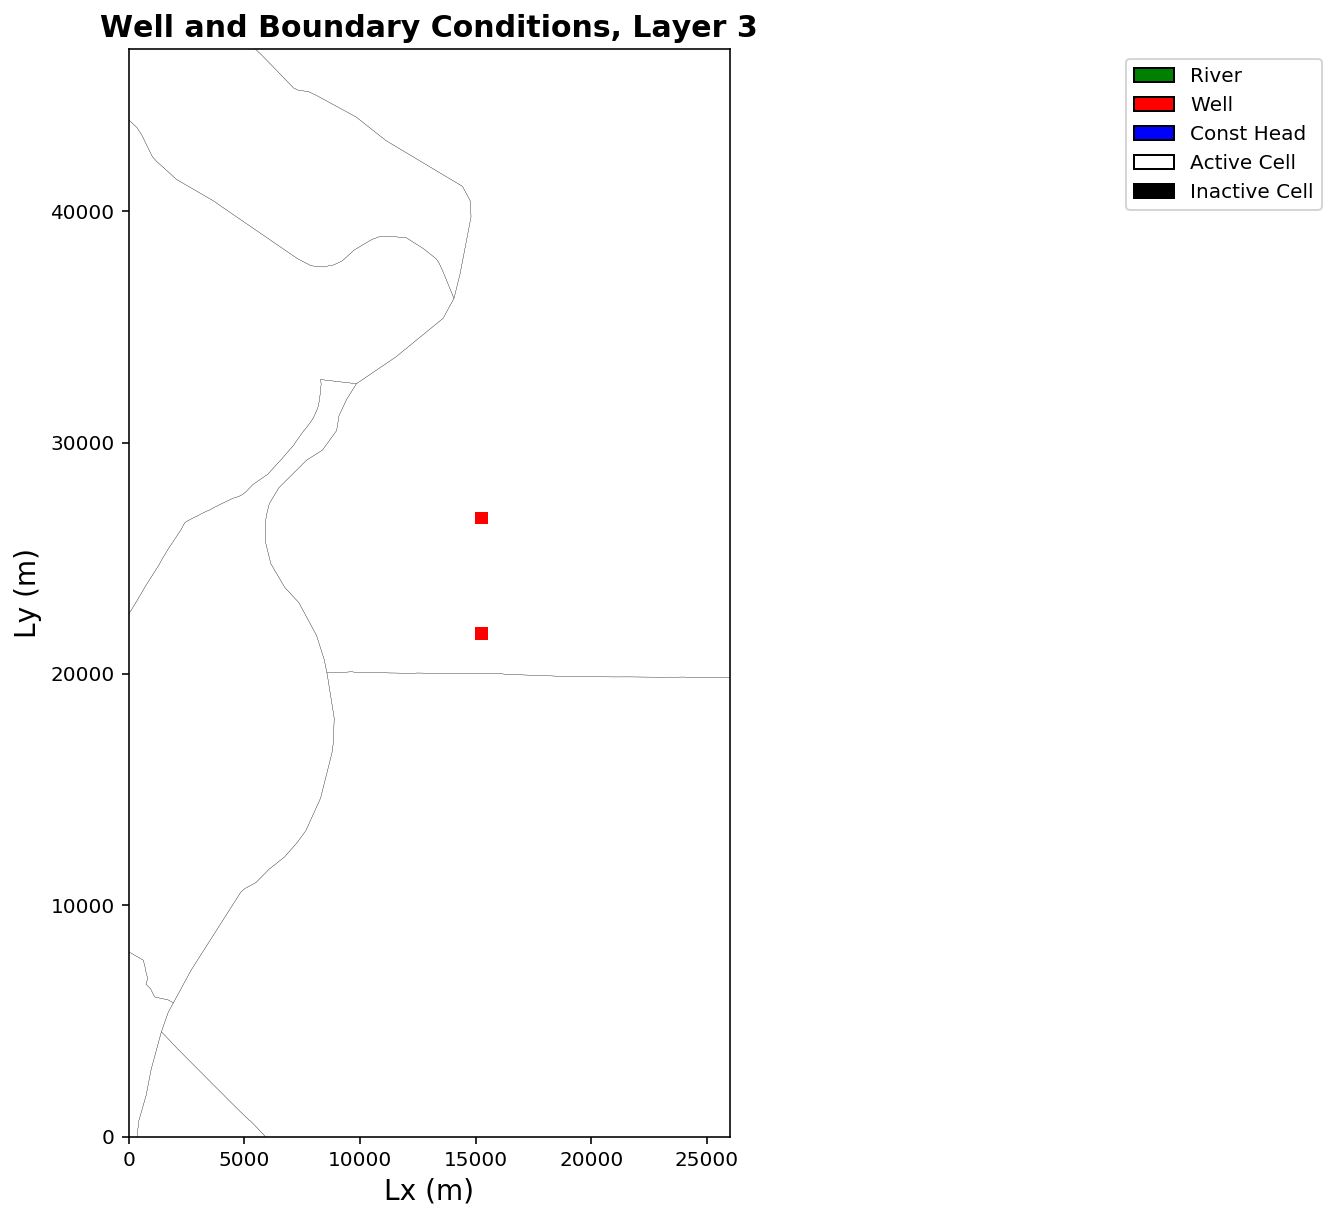

In [43]:
ltoplot = 2
#use flopy to plot grid, ibound, and wells
plt.figure(figsize=(10,10)) #create 10 x 10 figure
modelmap = flopy.plot.PlotMapView(model=mfm, layer=ltoplot)
#grid = modelmap.plot_grid()
ib = modelmap.plot_ibound()
wel = modelmap.plot_bc(ftype='WEL')
river_plot = modelmap.plot_bc(ftype='RIV')
#plt.scatter(xloc_m, yloc_m, marker=".", color="black", label="points")

#k_grid = modelmap.plot_array(k1)
#rechargegrid = modelmap.plot_array(rch_grid)
m.drawcounties()
#add labels and legend
plt.xlabel('Lx (m)',fontsize = 14)
plt.ylabel('Ly (m)',fontsize = 14)
plt.title('Well and Boundary Conditions, Layer '+str(ltoplot+1), fontsize = 15, fontweight = 'bold')
plt.legend(handles=[mp.patches.Patch(color='green',label='River',ec='black'),
                   mp.patches.Patch(color='red',label='Well',ec='black'),
                   mp.patches.Patch(color='blue',label='Const Head',ec='black'),
                   mp.patches.Patch(color='white',label='Active Cell',ec='black'),
                   mp.patches.Patch(color='black',label='Inactive Cell',ec='black')],
                   bbox_to_anchor=(2.,1.0))
plt.show(modelmap)

# Output Control

In [28]:
#create oc stress period data. 
spd = {(0, 0): ['save head', 'save budget']}

oc = flopy.modflow.ModflowOc(model=mfm, stress_period_data=spd, compact=True)

# PCG solver 

In [29]:
# flopy.modflow.mfpcg.ModflowPcg(model, mxiter=50, iter1=30, npcond=1, hclose=1e-05, rclose=1e-05, relax=1.0, nbpol=0, iprpcg=0, mutpcg=3, damp=1.0, dampt=1.0, ihcofadd=0, extension='pcg', unitnumber=None, filenames=None)

# define the solver package
pcg = flopy.modflow.ModflowPcg(model=mfm, mxiter = 250, iter1 = 50, hclose = 0.001, rclose = 0.1, relax = 0.98, damp = 0.7)

# write and run MODFLOW

In [30]:
#write MODFLOW input files
mfm.write_input()

In [31]:
# Run the model
success, mfoutput = mfm.run_model(pause=False, report=True)
if not success:
    raise Exception('MODFLOW did not terminate normally.')

FloPy is using the following  executable to run the model: /home/user/handouts/Week11MODFLOW/modflowdir/mf2005

                                  MODFLOW-2005     
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUND-WATER FLOW MODEL
                             Version 1.12.00 2/3/2017                        

 Using NAME file: AmerBot.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2019/04/15 20:05:20

 Solving:  Stress period:     1    Time step:     1    Ground-Water Flow Eqn.
 Run end date and time (yyyy/mm/dd hh:mm:ss): 2019/04/15 20:05:20
 Elapsed run time:  0.418 Seconds

  Normal termination of simulation


# Head

In [32]:
# extract head and flow data

#extract binary data from head file as flopy head object
headobj = flopy.utils.binaryfile.HeadFile(modelname+'.hds')
#extract head data from head object
head = headobj.get_data(totim=1.0)*3.28



In [33]:
#code to remove oddities, likley need to modify
headdim = head.shape

for a in np.arange(headdim[0]):
    for b in np.arange(headdim[1]):
        for c in np.arange(headdim[2]):
            if head[a,b,c]>1000:
                head[a,b,c] = head[a,b+1,c]
            elif head[a,b,c]<0:
                head[a,b,c] = head[a,b+1,c]

# Plotting

In [47]:
# layer to plot
ltoplot=0

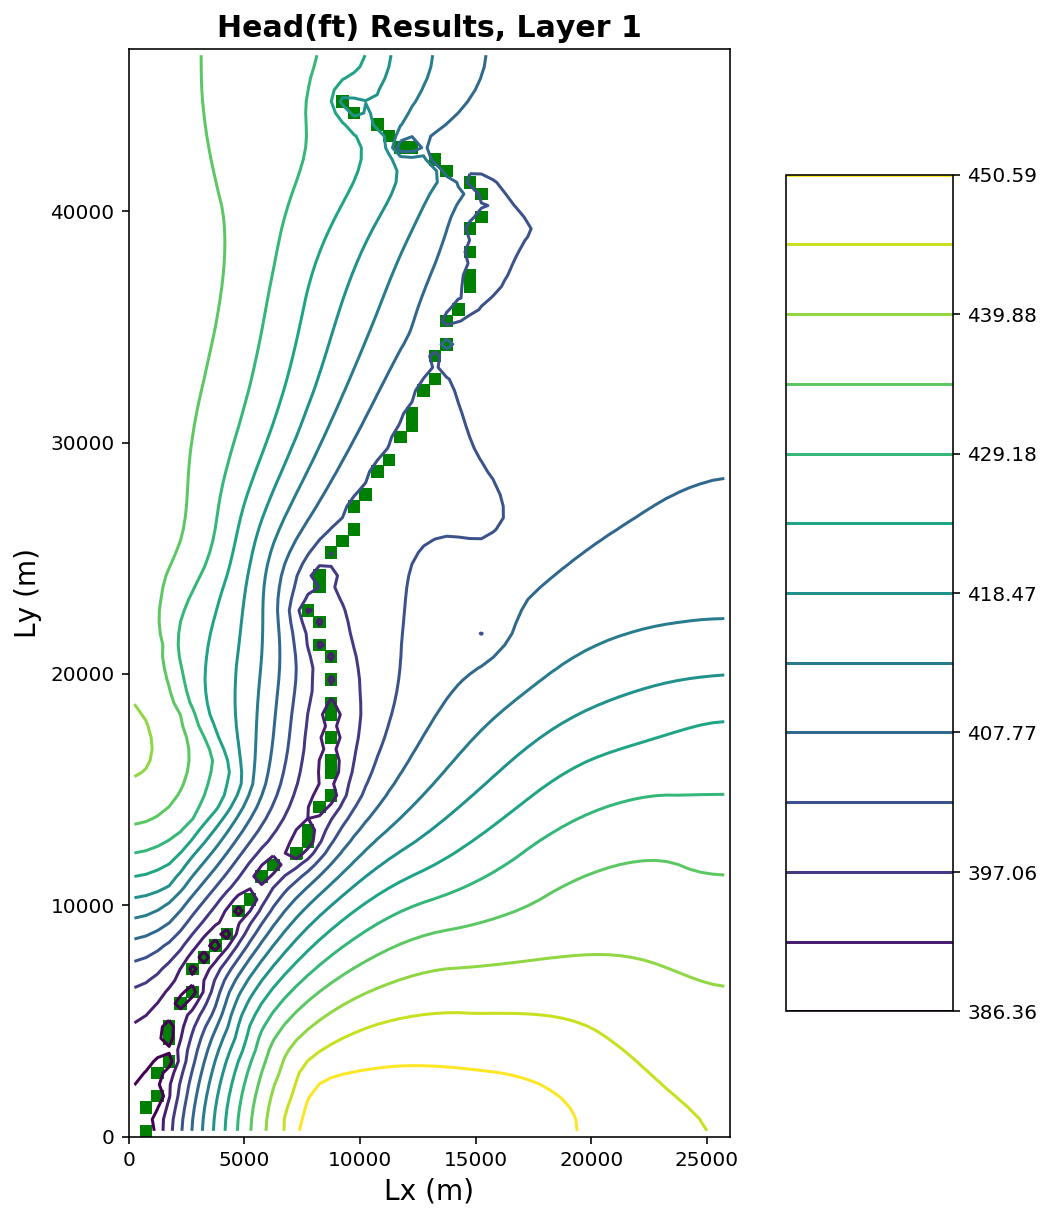

In [48]:
# 2D plot

#plot results
plt.figure(figsize=(10,10)) #create 10 x 10 figure
modelmap = flopy.plot.PlotMapView(model=mfm, layer=ltoplot) #use modelmap to attach plot to model
#grid = modelmap.plot_grid() #plot model grid
river_plot = modelmap.plot_bc(ftype='RIV')
contour_levels = np.linspace(head[ltoplot].min(),head[ltoplot].max(),15) #set contour levels for contouring head
head_contours = modelmap.contour_array(head, levels=contour_levels) #create head contours

#display parameters
plt.xlabel('Lx (m)',fontsize = 14)
plt.ylabel('Ly (m)',fontsize = 14)
plt.title('Head(ft) Results, Layer '+str(ltoplot+1), fontsize = 15, fontweight = 'bold')
plt.colorbar(head_contours,aspect=5)
plt.show(modelmap)

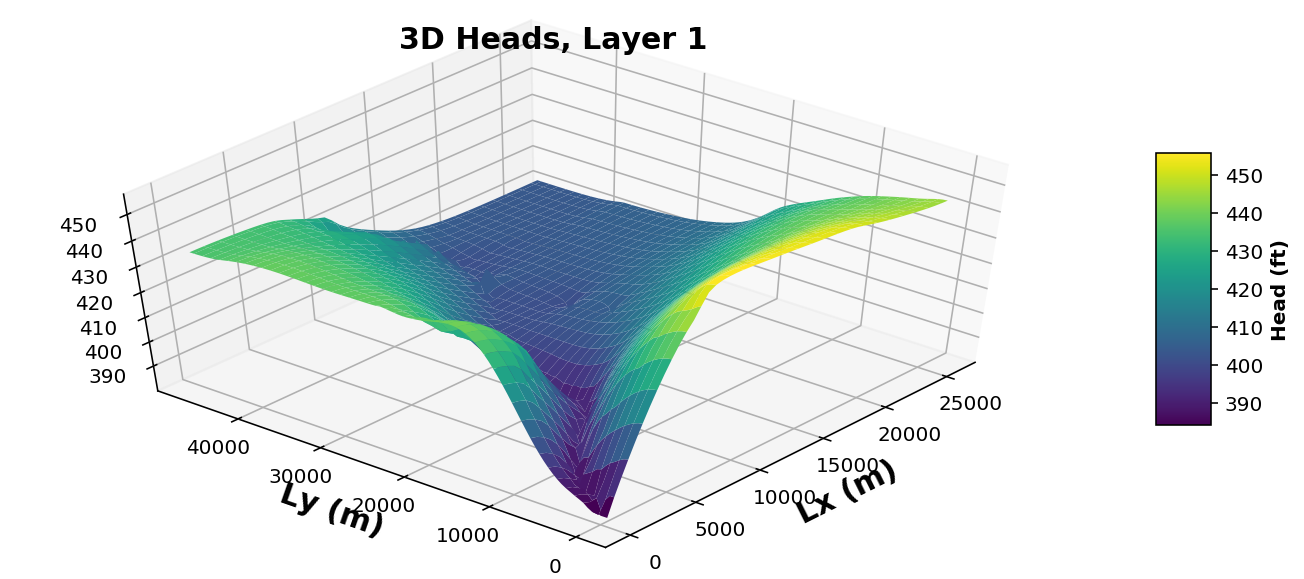

In [49]:
# 3d plot

#create 3d figure
fig_3d = plt.figure(figsize=(12,5))
ax = fig_3d.gca(projection='3d')

#set X, Y, Z variables for 3d plot to be our model domain and head solution
X = np.arange(0,Lx,dx)
Y = np.arange(0,Ly,dy)
X, Y = np.meshgrid(X, Y)
Z = np.flipud(head[ltoplot])

#create surface and labels
surf = ax.plot_surface(X,Y,Z, cmap = 'viridis', linewidth=0, label='head')
fig_3d.colorbar(surf,shrink=0.5,aspect=5).set_label('Head (ft)',fontsize=10,fontweight='bold')
ax.set_xlabel('Lx (m)', fontsize=15, fontweight='bold')
ax.set_ylabel('Ly (m)', fontsize=15, fontweight='bold')
ax.set_title('3D Heads, Layer '+str(ltoplot+1), fontsize=15, fontweight='bold')
ax.view_init(50,220)
plt.show(surf)

/home/user/.local/lib/python3.6/site-packages/flopy/plot/crosssection.py:763: PendingDeprecationWarning: ModelCrossSection will be replaced by PlotCrossSection(), Calling PlotCrossSection()
  warnings.warn(err_msg, PendingDeprecationWarning)


Text(0.5,1,'Row: 40')

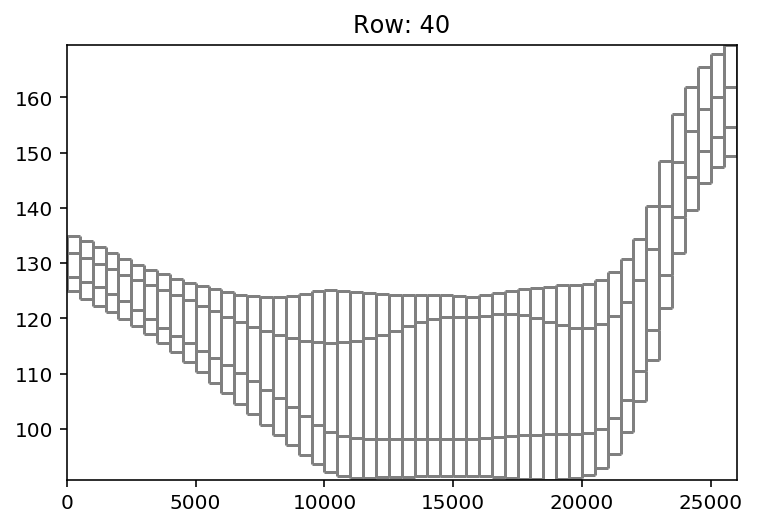

In [53]:
row = 40
xsec = flopy.plot.crosssection.ModelCrossSection(model= mfm, dis=dis, line={"row":row})
# assign key "row" or "column"
river_plot = xsec.plot_bc(ftype='RIV')
grid_plot = xsec.plot_grid()
plt.title("Row: " + str(row))